## **TC3213 GROUP PROJECT: ETL ON VILLAGE GROCER STORE**

URL = https://vsj.bites.com.my

**GROUP NAME**:

INTAN NURLIYANA BINTI MOHD ARIFF (A196791)

NURIN JAZLINA BINTI FEROZ (A195645)

NUR NABILAH HUSNA BINTI ROSLAN (A194126)

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [ ]:
from bs4 import BeautifulSoup
import requests

# URL and headers
BASE_URL = "https://vsj.bites.com.my"
URL = "https://vsj.bites.com.my/collections/groceries"
HEADERS = ({
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
})

In [ ]:
response = requests.get(URL, headers=HEADERS)
response

<Response [200]>

#**EXTRACT**

### **Attribute 1 : Product Link**

In [ ]:
# Function to fetch product links from a page
max_pages = 4

def fetch_links(page_number):
    try:
        url = f"https://vsj.bites.com.my/collections/groceries?page={page_number}"
        webpage = requests.get(url, headers=HEADERS)
        soup = BeautifulSoup(webpage.content, "html.parser")
        links = soup.find_all("a", attrs={'class': 'cd chp'})
        links_list = [BASE_URL + link.get('href') for link in links if link.get('href')]
        return links_list
    except Exception as e:
        print(f"Error fetching links from page {page_number}: {e}")
        return []

# Function to print product links
def print_links(max_pages):
    for page_number in range(1, max_pages + 1):
        page_links = fetch_links(page_number)
        for link in page_links:
            print(f"Product Link: {link}")

print_links(max_pages)

Product Link: https://vsj.bites.com.my/collections/groceries/products/massimo-sandwich-loaf-w-wheat-germ-400g
Product Link: https://vsj.bites.com.my/collections/groceries/products/vitagen-asst-twin-pack-2x5x125ml
Product Link: https://vsj.bites.com.my/collections/groceries/products/maggi-curry-5x79g
Product Link: https://vsj.bites.com.my/collections/groceries/products/jasmine-sunwhite-fragrant-rice-5kg
Product Link: https://vsj.bites.com.my/collections/groceries/products/vitagen-less-sugar-asst-twin-pack-2x5x125ml
Product Link: https://vsj.bites.com.my/collections/groceries/products/mission-tortilla-original-wraps-360g
Product Link: https://vsj.bites.com.my/collections/groceries/products/dutch-lady-uht-full-cream-3x1l
Product Link: https://vsj.bites.com.my/collections/groceries/products/anchor-wheat-flour-1kg
Product Link: https://vsj.bites.com.my/collections/groceries/products/arnotts-tim-tam-original-200g
Product Link: https://vsj.bites.com.my/collections/groceries/products/gardenia-

### **Attribute 2: Product Name**

In [ ]:
# Function to extract product title from a product page
def extract_product_title(link):
    try:
        product_page = requests.get(link, headers=HEADERS)
        new_soup = BeautifulSoup(product_page.content, "html.parser")
        # Extract product title
        title = new_soup.find("h1", attrs={"class": 'product_title entry-title'})
        return title.text.strip() if title else "N/A"
    except Exception as e:
        print(f"Error fetching details from {link}: {e}")
        return "N/A"

# Main function to scrape and print product titles
def print_product_titles(max_pages):
    for page_number in range(1, max_pages + 1):
        product_links = fetch_links(page_number)
        for link in product_links:
            title = extract_product_title(link)
            print(f"Product Name: {title}")

print_product_titles(max_pages)

Product Name: MASSIMO SANDWICH LOAF W.WHEAT GERM 400G
Product Name: VITAGEN ASST TWIN PACK 2X5X125ML
Product Name: MAGGI CURRY 5X79G
Product Name: JASMINE SUNWHITE FRAGRANT RICE 5KG
Product Name: VITAGEN LESS SUGAR ASST TWIN PACK 2X5X125ML
Product Name: MISSION TORTILLA ORIGINAL WRAPS 360G
Product Name: DUTCH LADY UHT FULL CREAM 3X1L
Product Name: ANCHOR WHEAT FLOUR 1KG
Product Name: ARNOTTS TIM TAM ORIGINAL 200G
Product Name: GARDENIA NUMEE YELLOW NOODLES 450G
Product Name: GARDENIA BUN SAMBAL BILIS 60G
Product Name: AYAM BRAND TUNA CHUNK IN WATER 150G
Product Name: UFC REFRESH COCONUT WATER 1L
Product Name: PREGO SPAGHETTI 500G
Product Name: ARNOTTS CHOC TIM TAM CLASSIC DARK 200G
Product Name: MILO RTD UHT 5+1X200ML
Product Name: JASMINE BIHUN 400G
Product Name: SAN REMO SPAGHETTI NO.5 500GM
Product Name: VITAGEN ASSORTED 5X125ML
Product Name: MILO AUSTRALIA 1KG
Product Name: AYAM BRAND SARDINES TALL 425G
Product Name: BARILLA SPAGHETTI 500G
Product Name: MASSIMO WHITE S.LOAF 600G
Pr

### **Attribute 3: Product Price**

In [ ]:
# Function to extract product price from a product page
def extract_product_price(link):
    try:
        product_page = requests.get(link, headers=HEADERS)
        new_soup = BeautifulSoup(product_page.content, "html.parser")
        # Extract product price
        price = new_soup.find("p", attrs={"class": "price", "id": "price_ppr"})
        return price.text.strip() if price else "N/A"
    except Exception as e:
        print(f"Error fetching price from {link}: {e}")
        return "N/A"


# Update the main function to print product titles and prices
def print_product_prices(max_pages):
    for page_number in range(1, max_pages + 1):
        product_links = fetch_links(page_number)
        for link in product_links:
            title = extract_product_title(link)
            price = extract_product_price(link)
            print(f"Product Price: {price}")

# Call the updated function
print_product_prices(max_pages)

Product Price: RM3.50
Product Price: RM9.90 RM9.78
Product Price: RM6.25 RM5.78
Product Price: RM37.05 RM31.88
Product Price: RM10.65
Product Price: RM8.60
Product Price: RM21.70 RM18.88
Product Price: RM3.90
Product Price: RM15.50 RM14.28
Product Price: RM2.00
Product Price: RM1.60
Product Price: RM7.70 RM7.49
Product Price: RM9.00
Product Price: RM5.20 RM4.88
Product Price: RM15.50 RM14.28
Product Price: RM10.45
Product Price: RM3.50
Product Price: RM5.30 RM4.68
Product Price: RM5.10
Product Price: RM50.90
Product Price: RM10.45
Product Price: RM8.15 RM7.28
Product Price: RM4.30
Product Price: RM24.35 RM22.68
Product Price: RM5.95 RM5.58
Product Price: RM51.90
Product Price: RM7.70 RM7.49
Product Price: RM4.95
Product Price: RM5.45
Product Price: RM71.00 RM59.88
Product Price: RM12.20 RM10.68
Product Price: RM5.40
Product Price: RM10.90
Product Price: RM3.00 RM2.88
Product Price: RM3.30
Product Price: RM3.50 RM3.18
Product Price: RM7.70 RM7.49
Product Price: RM6.25 RM5.78
Product Pri

### **Attribute 4: Product Quantity**

In [ ]:
# Function to extract maximum quantity from a product page
def extract_quantity(link):
    try:
        product_page = requests.get(link, headers=HEADERS)
        new_soup = BeautifulSoup(product_page.content, "html.parser")
        # Extract quantity input field
        quantity_input = new_soup.find("input", attrs={"type": "number", "class": "input-text qty text tc qty_pr_js"})

        if quantity_input:
            max_quantity = quantity_input["max"]  # Max quantity allowed
            return max_quantity
        else:
            return "N/A"
    except Exception as e:
        print(f"Error fetching max quantity from {link}: {e}")
        return "N/A"


# Update the main function to print maximum quantities
def print_quantities(max_pages):
    for page_number in range(1, max_pages + 1):
        product_links = fetch_links(page_number)  # This function needs to be implemented
        for link in product_links:
            max_quantity = extract_quantity(link)
            print(f"Product Quantity: {max_quantity}")

print_quantities(max_pages)

Product Quantity: 8
Product Quantity: 20
Product Quantity: 46
Product Quantity: 3
Product Quantity: 9
Product Quantity: 16
Product Quantity: 9999
Product Quantity: 62
Product Quantity: 30
Product Quantity: 5
Product Quantity: 21
Product Quantity: 37
Product Quantity: 24
Product Quantity: 28
Product Quantity: 28
Product Quantity: 9
Product Quantity: 23
Product Quantity: 22
Product Quantity: 14
Product Quantity: 81
Product Quantity: 14
Product Quantity: 20
Product Quantity: 7
Product Quantity: 6
Product Quantity: 10
Product Quantity: 3
Product Quantity: 14
Product Quantity: 9
Product Quantity: 3
Product Quantity: 6
Product Quantity: 35
Product Quantity: 7
Product Quantity: 2
Product Quantity: 15
Product Quantity: 11
Product Quantity: 23
Product Quantity: 31
Product Quantity: 5
Product Quantity: 20
Product Quantity: 4
Product Quantity: 18
Product Quantity: 9
Product Quantity: 6
Product Quantity: 8
Product Quantity: 15
Product Quantity: 34
Product Quantity: 6
Product Quantity: 10
Product Q

### **Attribute 5: Product Brand**

In [ ]:
# Function to extract brand from a product page
def extract_brand(link):
    try:
        product_page = requests.get(link, headers=HEADERS)
        new_soup = BeautifulSoup(product_page.content, "html.parser")
        # Extract brand information
        brand_span = new_soup.find("span", attrs={"class": "vendor value", "id": "product-vendor_ppr"})

        if brand_span:
            brand_name = brand_span.get_text(strip=True)  # Extract and clean the text
            return brand_name
        else:
            return "Brand not found"
    except Exception as e:
        print(f"Error fetching brand from {link}: {e}")
        return "Error"

# Update the main function to print brand names
def print_brands(max_pages):
    for page_number in range(1, max_pages + 1):
        product_links = fetch_links(page_number)  # This function needs to be implemented
        for link in product_links:
            brand_name = extract_brand(link)
            print(f"Product Brand: {brand_name}")

print_brands(max_pages)

Product Brand: Massimo
Product Brand: Vitagen
Product Brand: Maggi
Product Brand: Jasmine
Product Brand: Vitagen
Product Brand: Mission
Product Brand: Dutch Lady
Product Brand: Anchor
Product Brand: Arnott's
Product Brand: Gardenia
Product Brand: Gardenia
Product Brand: Ayam Brand
Product Brand: UFC
Product Brand: Prego
Product Brand: Arnott's
Product Brand: Bites Shop
Product Brand: Jasmine
Product Brand: San Remo
Product Brand: Vitagen
Product Brand: Milo
Product Brand: Ayam Brand
Product Brand: Barilla
Product Brand: Massimo
Product Brand: Farmhouse
Product Brand: Maggi
Product Brand: Faiza
Product Brand: Ayam Brand
Product Brand: Vitagen
Product Brand: CSR
Product Brand: Jasmine
Product Brand: Sanitarium
Product Brand: Vitagen
Product Brand: Spritzer
Product Brand: Star Brand
Product Brand: Ayam Brand
Product Brand: Oreo
Product Brand: Ayam Brand
Product Brand: Maggi
Product Brand: Carnation
Product Brand: Maggi
Product Brand: Prego
Product Brand: Marigold
Product Brand: Biscoff
Pr

### **Attribute 6: Product Category**

In [ ]:
# Function to extract category from a product page
def extract_category(link):
    try:
        product_page = requests.get(link, headers=HEADERS)
        new_soup = BeautifulSoup(product_page.content, "html.parser")
        # Extract category information
        category_span = new_soup.find("span", attrs={"class": "posted_in"})

        if category_span:
            category_name = category_span.get_text(strip=True)  # Extract and clean the text
            # Remove the word "categories"
            category_name = category_name.replace("Categories:", "").strip()
            return category_name
        else:
            return "Category not found"
    except Exception as e:
        print(f"Error fetching category from {link}: {e}")
        return "Error"

# Update the main function to print categories
def print_categories(max_pages):
    for page_number in range(1, max_pages + 1):
        product_links = fetch_links(page_number)  # This function needs to be implemented
        for link in product_links:
            category_name = extract_category(link)
            print(f"Product Category: {category_name}")

print_categories(max_pages)

Product Category: All items,Bakery,Best Seller,Bread,Except Alcohol,Groceries
Product Category: All items,Beverages,Chilled Juices & Drinks,CNY Fair,Cold Beverages,Dairy & Eggs,Except Alcohol,Fridge,Groceries,Milk
Product Category: All items,Canned Food & Instant Meals,Childhood Memories,Childhood Memories,Except Alcohol,Groceries,Pantry
Product Category: All items,CNY Fair,Except Alcohol,Groceries,Pantry,Pasta, Rice & Noodles,Rice
Product Category: All items,Beverages,Chilled Juices & Drinks,Christmas Fair,Cold Beverages,Dairy & Eggs,Except Alcohol,Fridge,Groceries
Product Category: All items,Bakery,Bread,Except Alcohol,Groceries
Product Category: All items,Beverages,Dairy & Eggs,Except Alcohol,Fridge,Groceries,UHT Milk
Product Category: All items,Baking Ingredients,Except Alcohol,Groceries,Pantry
Product Category: All items,Biscuits & Cookies,Christmas Fair,Except Alcohol,Groceries,October Deals,Pantry,Snacks & Sweets
Product Category: All items,Except Alcohol,Groceries,Pantry
Produc

### **Attribute 7: Product Tag**

In [ ]:
# Function to extract tags from a product page
def extract_tags(link):
    try:
        product_page = requests.get(link, headers=HEADERS)
        new_soup = BeautifulSoup(product_page.content, "html.parser")
        # Extract tags information
        tags_span = new_soup.find("span", attrs={"class": "tagged_as"})

        if tags_span:
            tags = tags_span.get_text(strip=True)  # Extract and clean the text
            tags = tags.replace("Tags:", "").strip()
            return tags
        else:
            return "Tags not found"
    except Exception as e:
        print(f"Error fetching tags from {link}: {e}")
        return "Error"

# Update the main function to print tags
def print_tags(max_pages):
    for page_number in range(1, max_pages + 1):
        product_links = fetch_links(page_number)  # This function needs to be implemented
        for link in product_links:
            tags = extract_tags(link)
            print(f"Product Tag: {tags}")

print_tags(max_pages)

Product Tag: Bakery,Best Seller,Bread,Massimo,whole wheat
Product Tag: Beverages,Chilled Drinks,CNY Fair,Dairy,Fridge,Milk,On Sale,Vitagen
Product Tag: Childhood Memories,Groceries,Instant Food,Instant Meals,Instant Noodles,Maggi,On Sale,Pantry
Product Tag: CNY Fair,Fragrant Rice,Groceries,Jasmine,On Sale,Pantry,Rice
Product Tag: Beverages,Chilled Drinks,Christmas Fair,Cultured Milk,Dairy,Fridge,Groceries,Vitagen
Product Tag: Bakery,Bread,Groceries,Mission
Product Tag: Beverages,Dairy,Dutch Lady,Groceries,On Sale,UHT Milk
Product Tag: Anchor,Baking,Flour,Groceries,Pantry
Product Tag: Arnott's,Biscuits,Christmas Fair,Cookies,Groceries,October Deals,On Sale,Pantry,Snacks
Product Tag: Gardenia,Groceries,Noodle,Pantry
Product Tag: Bakery,Bread,Gardenia,Groceries,Pantry
Product Tag: Ayam Brand,Canned Food,Groceries,Instant Meals,On Sale,Pantry
Product Tag: Beverages,Coconut Water,Groceries,Mixed Drink,UFC
Product Tag: Christmas Fair,CNY Fair,Groceries,On Sale,Pantry,Pasta,Prego
Product Tag:

### **Attribute 8: Product Discount**

In [ ]:
# Function to extract product discount
def extract_discount(link):
    try:
        product_page = requests.get(link, headers=HEADERS)
        new_soup = BeautifulSoup(product_page.content, "html.parser")
        # Extract product discount
        discount_div = new_soup.find("span", attrs={"class": "tc nt_labels pa pe_none cw"})

        if discount_div:
            discount = discount_div.get_text(strip=True)  # Extract and clean the text
            return discount
        else:
            return "Discount not found"
    except Exception as e:
        print(f"Error fetching discount from {link}: {e}")
        return "Error"

# Update the main function to print description
def print_discount(max_pages):
    for page_number in range(1, max_pages + 1):
        product_links = fetch_links(page_number)
        for link in product_links:
            discount = extract_discount(link)
            print(f"Product Discount: {discount}")

print_discount(max_pages)

Product Discount: 
Product Discount: -2%
Product Discount: -8%
Product Discount: -14%
Product Discount: 
Product Discount: 
Product Discount: -13%
Product Discount: 
Product Discount: -8%
Product Discount: 
Product Discount: 
Product Discount: -3%
Product Discount: 
Product Discount: -7%
Product Discount: -8%
Product Discount: 
Product Discount: 
Product Discount: -12%
Product Discount: 
Product Discount: 
Product Discount: 
Product Discount: -11%
Product Discount: 
Product Discount: -7%
Product Discount: -7%
Product Discount: 
Product Discount: -3%
Product Discount: 
Product Discount: 
Product Discount: -16%
Product Discount: -13%
Product Discount: 
Product Discount: 
Product Discount: -4%
Product Discount: 
Product Discount: -10%
Product Discount: -3%
Product Discount: -8%
Product Discount: -7%
Product Discount: 
Product Discount: -7%
Product Discount: -20%
Product Discount: 
Product Discount: 
Product Discount: Discount not found
Product Discount: 
Product Discount: 
Product Discoun

### **Save to Pandas DataFrame**


In [ ]:
import pandas as pd

# Function to scrape all attributes of a product using existing functions
def scrape_product_details(link):
    title = extract_product_title(link)
    price = extract_product_price(link)
    quantity = extract_quantity(link)
    brand = extract_brand(link)
    category = extract_category(link)
    tags = extract_tags(link)
    discount = extract_discount(link)

    return {
        "Product Name": title,
        "Product Price": price,
        "Product Quantity": quantity,
        "Product Brand": brand,
        "Product Category": category,
        "Product Tag": tags,
        "Product Discount": discount,
        "Link to Product": link
    }

# Function to consolidate the scraping process
def scrape_all_products_to_dataframe(max_pages):
    product_data = []

    # Use existing fetch_links function to get all product links
    for page_number in range(1, max_pages + 1):
        product_links = fetch_links(page_number)

        for link in product_links:
            details = scrape_product_details(link)  # Collect all attributes for each product
            product_data.append(details)

    # Create a DataFrame from the collected data
    df = pd.DataFrame(product_data)
    return df

# Call the function to scrape and save data
df = scrape_all_products_to_dataframe(max_pages)
df

,Product Name,Product Price,Product Quantity,Product Brand,Product Category,Product Tag,Product Discount,Link to Product
0,MASSIMO SANDWICH LOAF W.WHEAT GERM 400G,RM3.50,8,Massimo,"All items,Bakery,Best Seller,Bread,Except Alco...","Bakery,Best Seller,Bread,Massimo,whole wheat",,https://vsj.bites.com.my/collections/groceries...
1,VITAGEN ASST TWIN PACK 2X5X125ML,RM9.90 RM9.78,20,Vitagen,"All items,Beverages,Chilled Juices & Drinks,CN...","Beverages,Chilled Drinks,CNY Fair,Dairy,Fridge...",-2%,https://vsj.bites.com.my/collections/groceries...
2,MAGGI CURRY 5X79G,RM6.25 RM5.78,46,Maggi,"All items,Canned Food & Instant Meals,Childhoo...","Childhood Memories,Groceries,Instant Food,Inst...",-8%,https://vsj.bites.com.my/collections/groceries...
3,JASMINE SUNWHITE FRAGRANT RICE 5KG,RM37.05 RM31.88,3,Jasmine,"All items,CNY Fair,Except Alcohol,Groceries,Pa...","CNY Fair,Fragrant Rice,Groceries,Jasmine,On Sa...",-14%,https://vsj.bites.com.my/collections/groceries...
4,VITAGEN LESS SUGAR ASST TWIN PACK 2X5X125ML,RM10.65,9,Vitagen,"All items,Beverages,Chilled Juices & Drinks,Ch...","Beverages,Chilled Drinks,Christmas Fair,Cultur...",,https://vsj.bites.com.my/collections/groceries...
...,...,...,...,...,...,...,...,...
195,MAGGI OYSTER SAUCE 500G,RM7.90 RM7.28,11,Maggi,"All items,Except Alcohol,Groceries,Pantry,Sauc...","groceries,Maggi,On Sale,oyster sauce,pantry,Sa...",-8%,https://vsj.bites.com.my/collections/groceries...
196,MAGGI OYSTER SAUCE 340G,RM6.00,16,Maggi,"All items,Except Alcohol,Groceries,Pantry,Sauc...","groceries,Maggi,oyster sauce,pantry,Sauces",,https://vsj.bites.com.my/collections/groceries...
197,JASMINE SUPER 5 (IMPORT) 5KG,RM22.35 RM19.88,3,Jasmine,"All items,Except Alcohol,Groceries,Pantry,Past...","Grains,Groceries,Jasmine,On Sale,Pantry,Rice",-12%,https://vsj.bites.com.my/collections/groceries...
198,CIRIO WHOLE PEELED TOMATO 3X400GM,RM22.85,13,Cirio,"All items,Canned Food & Instant Meals,Christma...","Canned Food,Christmas Fair,Cirio,Groceries,Ins...",,https://vsj.bites.com.my/collections/groceries...


In [ ]:
# Calculate the total number of products
product_count = len(df)  # or df.shape[0] for the number of rows
print(f"Total number of products: {product_count}")

Total number of products: 200


In [ ]:
# Save the raw dataset
raw_df = df.copy()
file_name = 'raw_vgbites_dataset.csv'
raw_df.to_csv(file_name, index=False)
print(f'Raw data has been saved to {file_name}')

Raw data has been saved to raw_vgbites_dataset.csv


### **Details of the extracted data using Tabulate**

In [ ]:
from tabulate import tabulate
# Function to tabulate the data
def tabulate_dataframe(df):
    # Use tabulate to create a table with headers
    df.index = range(1, len(df) + 1)  # Adjust index to start from 1
    table = tabulate(df, headers="keys", tablefmt="grid", showindex=True)
    print(table)

tabulate_dataframe(df)

+-----+---------------------------------------------------+-------------------+--------------------+--------------------------------+------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------+--------------------+-----------------------------------------------------------------------------------------------------------+
|     | Product Name                                      | Product Price     |   Product Quantity | Product Brand                  | Product Category                                                                                                                   | Product Tag                                                                                  | Product Discount   | Link to Product                                                                                           |
+=====+===========

# **TRANSFORM**

### **Step 1: Drop duplicate**

In [ ]:
# Drop duplicate rows if any
df.drop_duplicates(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 1 to 200
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product Name      200 non-null    object
 1   Product Price     200 non-null    object
 2   Product Quantity  200 non-null    object
 3   Product Brand     200 non-null    object
 4   Product Category  200 non-null    object
 5   Product Tag       200 non-null    object
 6   Product Discount  200 non-null    object
 7   Link to Product   200 non-null    object
dtypes: object(8)
memory usage: 12.6+ KB
None


### **Step 2: Convert discount to float and fill blank discount with 0.0**

In [ ]:
# Handle missing or placeholder values and transform 'Product Discount' to numeric
placeholders = ['N/A', '-', '', 'None', 'Discount not found']
df['Product Discount'] = (
    df['Product Discount']
    .astype(str) # Convert the column to string type first
    .replace(placeholders, '0', regex=True)  # Replace placeholders with '0' using regex for flexibility
    .str.replace('%', '', regex=False)  # Remove '%' if present
    .astype(float)  # Convert to numeric
)

df[['Product Name', 'Product Price', 'Product Discount']]

,Product Name,Product Price,Product Discount
1,MASSIMO SANDWICH LOAF W.WHEAT GERM 400G,RM3.50,0.0
2,VITAGEN ASST TWIN PACK 2X5X125ML,RM9.90 RM9.78,2.0
3,MAGGI CURRY 5X79G,RM6.25 RM5.78,8.0
4,JASMINE SUNWHITE FRAGRANT RICE 5KG,RM37.05 RM31.88,14.0
5,VITAGEN LESS SUGAR ASST TWIN PACK 2X5X125ML,RM10.65,0.0
...,...,...,...
196,MAGGI OYSTER SAUCE 500G,RM7.90 RM7.28,8.0
197,MAGGI OYSTER SAUCE 340G,RM6.00,0.0
198,JASMINE SUPER 5 (IMPORT) 5KG,RM22.35 RM19.88,12.0
199,CIRIO WHOLE PEELED TOMATO 3X400GM,RM22.85,0.0


### **Step 3: Convert Product Name, Product Brand, Product Tag and Product Category to lowercase**

In [ ]:
# Convert each text column to lowercase and strip extra whitespaces
text_columns = ['Product Name', 'Product Brand', 'Product Tag', 'Product Category']
for col in text_columns:
    df[col] = df[col].apply(lambda x: [i.strip().lower() for i in x] if isinstance(x, list) else x.strip().lower())

df[text_columns]

,Product Name,Product Brand,Product Tag,Product Category
1,massimo sandwich loaf w.wheat germ 400g,massimo,"bakery,best seller,bread,massimo,whole wheat","all items,bakery,best seller,bread,except alco..."
2,vitagen asst twin pack 2x5x125ml,vitagen,"beverages,chilled drinks,cny fair,dairy,fridge...","all items,beverages,chilled juices & drinks,cn..."
3,maggi curry 5x79g,maggi,"childhood memories,groceries,instant food,inst...","all items,canned food & instant meals,childhoo..."
4,jasmine sunwhite fragrant rice 5kg,jasmine,"cny fair,fragrant rice,groceries,jasmine,on sa...","all items,cny fair,except alcohol,groceries,pa..."
5,vitagen less sugar asst twin pack 2x5x125ml,vitagen,"beverages,chilled drinks,christmas fair,cultur...","all items,beverages,chilled juices & drinks,ch..."
...,...,...,...,...
196,maggi oyster sauce 500g,maggi,"groceries,maggi,on sale,oyster sauce,pantry,sa...","all items,except alcohol,groceries,pantry,sauc..."
197,maggi oyster sauce 340g,maggi,"groceries,maggi,oyster sauce,pantry,sauces","all items,except alcohol,groceries,pantry,sauc..."
198,jasmine super 5 (import) 5kg,jasmine,"grains,groceries,jasmine,on sale,pantry,rice","all items,except alcohol,groceries,pantry,past..."
199,cirio whole peeled tomato 3x400gm,cirio,"canned food,christmas fair,cirio,groceries,ins...","all items,canned food & instant meals,christma..."


### **Step 4: Extract the original price (first part) and discounted price (second part), and convert to float**

In [ ]:
# Extract the original price (first part) and discounted price (second part) and convert to numeric
df['Discounted Price'] = (
    df['Product Price']
    .apply(lambda x: x.split(' ')[1] if ' ' in x else None)  # Extract the second part (discounted price)
    .str.replace('RM', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float, errors='ignore')
)

df['Product Price'] = (
    df['Product Price']
    .apply(lambda x: x.split(' ')[0] if x != 'None' else None)  # Extract the first part (original price)
    .str.replace('RM', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float, errors='ignore')
)

# Set Discounted Price to None if it equals the Product Price
df['Discounted Price'] = df.apply(
    lambda row: None if row['Discounted Price'] == row['Product Price'] else row['Discounted Price'],
    axis=1
)

# Display the updated DataFrame
df[['Product Name', 'Product Price', 'Discounted Price']]

,Product Name,Product Price,Discounted Price
1,massimo sandwich loaf w.wheat germ 400g,3.50,NaN
2,vitagen asst twin pack 2x5x125ml,9.90,9.78
3,maggi curry 5x79g,6.25,5.78
4,jasmine sunwhite fragrant rice 5kg,37.05,31.88
5,vitagen less sugar asst twin pack 2x5x125ml,10.65,NaN
...,...,...,...
196,maggi oyster sauce 500g,7.90,7.28
197,maggi oyster sauce 340g,6.00,NaN
198,jasmine super 5 (import) 5kg,22.35,19.88
199,cirio whole peeled tomato 3x400gm,22.85,NaN


### **Step 5: Convert Product Quantity to int**

In [ ]:
# Handle 'Product Quantity' (convert to int)
df['Product Quantity'] = df['Product Quantity'].astype(int)
df[['Product Name', 'Product Quantity']]

,Product Name,Product Quantity
1,massimo sandwich loaf w.wheat germ 400g,8
2,vitagen asst twin pack 2x5x125ml,20
3,maggi curry 5x79g,46
4,jasmine sunwhite fragrant rice 5kg,3
5,vitagen less sugar asst twin pack 2x5x125ml,9
...,...,...
196,maggi oyster sauce 500g,11
197,maggi oyster sauce 340g,16
198,jasmine super 5 (import) 5kg,3
199,cirio whole peeled tomato 3x400gm,13


### **Step 6: Store Product Tag and Product Category as lists**

In [ ]:
# Store 'Product Tag' and 'Product Category' as lists
exclude_categories = ['all items']
df['Product Tag'] = df['Product Tag'].str.split(',').apply(lambda tags: [tag.strip() for tag in tags])
df['Product Category'] = df['Product Category'].str.split(',').apply(lambda cats: [cat.strip() for cat in cats if cat.strip().lower() not in exclude_categories])
df[['Product Tag', 'Product Category']]

,Product Tag,Product Category
1,"[bakery, best seller, bread, massimo, whole wh...","[bakery, best seller, bread, except alcohol, g..."
2,"[beverages, chilled drinks, cny fair, dairy, f...","[beverages, chilled juices & drinks, cny fair,..."
3,"[childhood memories, groceries, instant food, ...","[canned food & instant meals, childhood memori..."
4,"[cny fair, fragrant rice, groceries, jasmine, ...","[cny fair, except alcohol, groceries, pantry, ..."
5,"[beverages, chilled drinks, christmas fair, cu...","[beverages, chilled juices & drinks, christmas..."
...,...,...
196,"[groceries, maggi, on sale, oyster sauce, pant...","[except alcohol, groceries, pantry, sauces, oi..."
197,"[groceries, maggi, oyster sauce, pantry, sauces]","[except alcohol, groceries, pantry, sauces, oi..."
198,"[grains, groceries, jasmine, on sale, pantry, ...","[except alcohol, groceries, pantry, pasta, ric..."
199,"[canned food, christmas fair, cirio, groceries...","[canned food & instant meals, christmas fair, ..."


### **Checking data type**


In [ ]:
# Use info() to get additional details
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 1 to 200
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Name      200 non-null    object 
 1   Product Price     200 non-null    float64
 2   Product Quantity  200 non-null    int64  
 3   Product Brand     200 non-null    object 
 4   Product Category  200 non-null    object 
 5   Product Tag       200 non-null    object 
 6   Product Discount  200 non-null    float64
 7   Link to Product   200 non-null    object 
 8   Discounted Price  99 non-null     float64
dtypes: float64(3), int64(1), object(5)
memory usage: 14.2+ KB


## **Data Visualizations**

### **Product Price Before and After Cleaning**

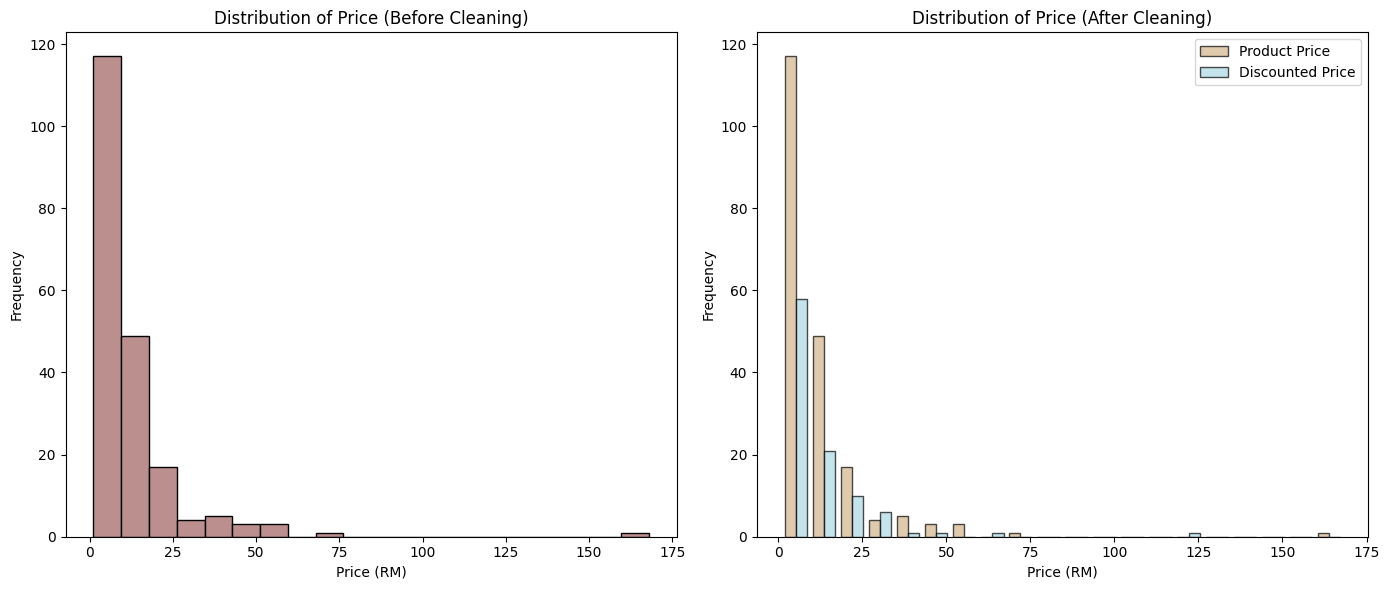

In [ ]:
import matplotlib.pyplot as plt

# Overall Product Price Distribution Before and After Cleaning
plt.figure(figsize=(14, 6))

# Before cleaning
plt.subplot(1, 2, 1)
raw_prices = raw_df['Product Price'].str.extract(r'(\d+\.\d+)')[0].astype(float)  # Extract and convert the first price to numeric
raw_prices.plot(kind='hist', bins=20, color='rosybrown', edgecolor='black')
plt.title("Distribution of Price (Before Cleaning)")
plt.xlabel("Price (RM)")
plt.ylabel("Frequency")

# After cleaning - Double histogram for Product Price and Discounted Price
plt.subplot(1, 2, 2)
product_prices = df['Product Price']  # Cleaned 'Product Price' column
discounted_prices = df['Discounted Price']  # Cleaned 'Discounted Price' column

# Plotting both histograms together
plt.hist(
    [product_prices, discounted_prices],
    bins=20,
    color=['tan', 'lightblue'],
    edgecolor='black',
    label=['Product Price', 'Discounted Price'],
    alpha=0.7,
)
plt.title("Distribution of Price (After Cleaning)")
plt.xlabel("Price (RM)")
plt.ylabel("Frequency")
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### **Product Discount Before and After Cleaning**

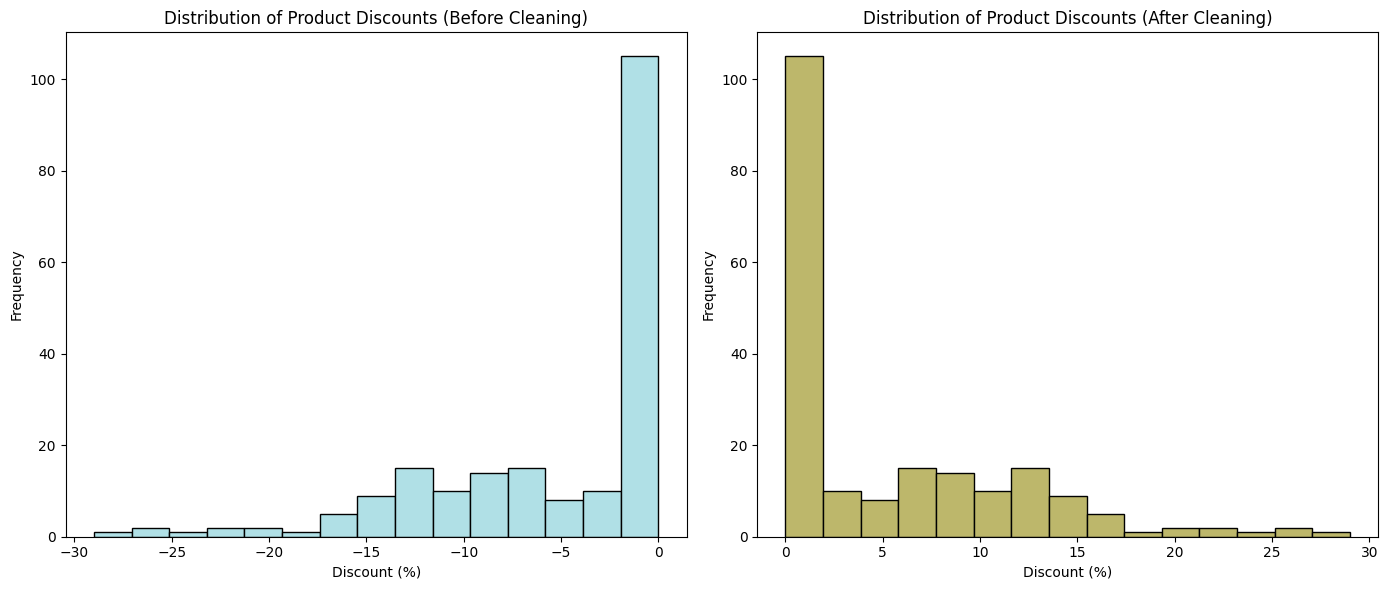

In [ ]:
# Ensure the 'Product Discount' column is of type string before applying .str methods
raw_df['Product Discount'] = raw_df['Product Discount'].astype(str)

# Remove '%' sign and convert to numeric
raw_df['Product Discount'] = raw_df['Product Discount'].str.replace('%', '', regex=True)
raw_df['Product Discount'] = pd.to_numeric(raw_df['Product Discount'], errors='coerce')

# Re-plot the histogram
plt.figure(figsize=(14, 6))

# Before cleaning
plt.subplot(1, 2, 1)
raw_df['Product Discount'] = raw_df['Product Discount'].fillna(0)  # Reset any NaN before cleaning
raw_df['Product Discount'].plot(kind='hist', bins=15, color='powderblue', edgecolor='black')
plt.title('Distribution of Product Discounts (Before Cleaning)')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')

# After cleaning
plt.subplot(1, 2, 2)
df['Product Discount'].plot(kind='hist', bins=15, color='darkkhaki', edgecolor='black')
plt.title('Distribution of Product Discounts (After Cleaning)')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### **Products by Price Before and After Cleaning**

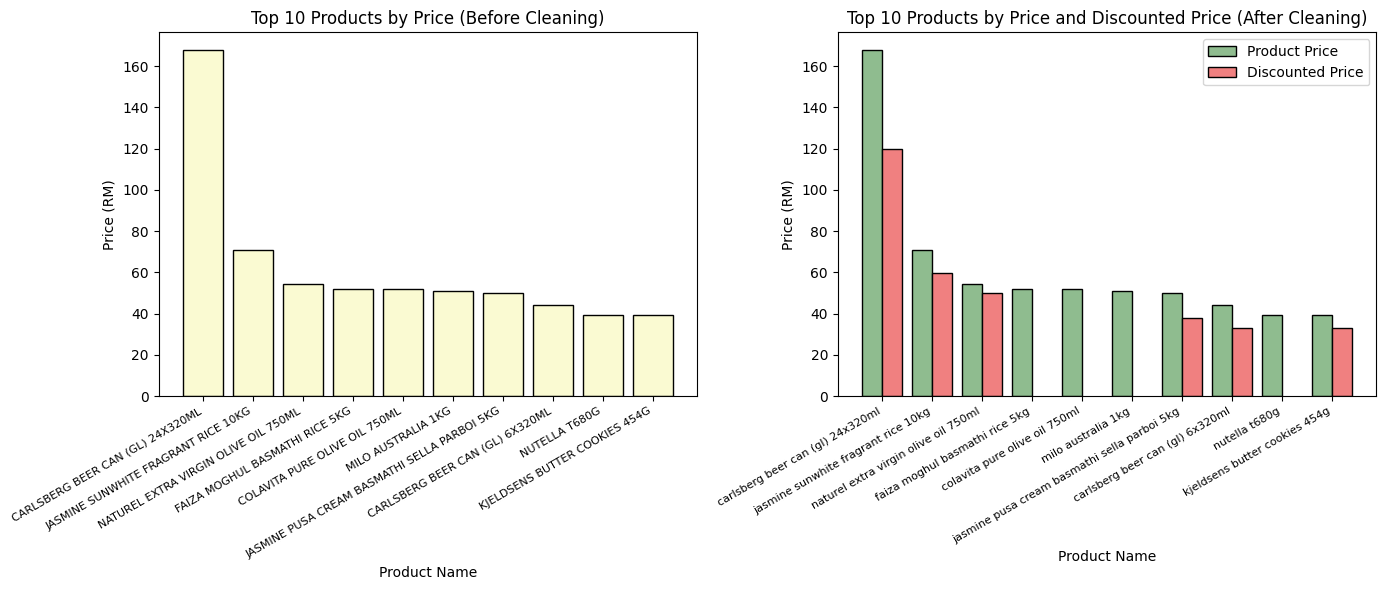

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Top 10 Product Price Before and After Cleaning
plt.figure(figsize=(14, 6))

# Before cleaning
plt.subplot(1, 2, 1)
# Extract top 10 products with the highest price in the raw dataset
raw_prices = raw_df['Product Price'].dropna()
raw_prices = raw_prices.str.extract(r'(\d+\.?\d*)').astype(float)  # Extract numeric prices
raw_top10 = raw_df.loc[raw_prices[0].nlargest(10).index, ['Product Name', 'Product Price']]
raw_top10['Product Price'] = raw_prices[0].loc[raw_prices[0].nlargest(10).index]

plt.bar(raw_top10['Product Name'], raw_top10['Product Price'], color='lightgoldenrodyellow', edgecolor='black')
plt.title("Top 10 Products by Price (Before Cleaning)")
plt.xlabel("Product Name")
plt.ylabel("Price (RM)")
plt.xticks(rotation=30, ha='right', fontsize=8)

# After cleaning
plt.subplot(1, 2, 2)
# Extract top 10 products with the highest discounted price in the cleaned dataset
cleaned_top10 = df[df['Product Price'].notna()]  # Filter rows with valid prices
cleaned_top10 = cleaned_top10.sort_values(by='Product Price', ascending=False).head(10)

# Create grouped bar chart for Product Price and Discounted Price
x = np.arange(len(cleaned_top10))  # X positions for bars
bar_width = 0.4

plt.bar(
    x - bar_width / 2,
    cleaned_top10['Product Price'],
    width=bar_width,
    color='darkseagreen',
    edgecolor='black',
    label='Product Price',
)
plt.bar(
    x + bar_width / 2,
    cleaned_top10['Discounted Price'],
    width=bar_width,
    color='lightcoral',
    edgecolor='black',
    label='Discounted Price',
)

plt.title("Top 10 Products by Price and Discounted Price (After Cleaning)")
plt.xlabel("Product Name")
plt.ylabel("Price (RM)")
plt.xticks(x, cleaned_top10['Product Name'], rotation=30, ha='right', fontsize=8)
plt.legend()

plt.tight_layout()
plt.show()

#**LOAD**

### **Save into CSV file and display**

In [ ]:
# Save the cleaned data into a CSV file
output_file = 'vg_bites_dataset.csv'
df.to_csv(output_file, index=False)
print(f'Cleaned data has been saved to {output_file}')

Cleaned data has been saved to vg_bites_dataset.csv


In [ ]:
# Display the saved data
df

,Product Name,Product Price,Product Quantity,Product Brand,Product Category,Product Tag,Product Discount,Link to Product,Discounted Price
1,massimo sandwich loaf w.wheat germ 400g,3.50,8,massimo,"[bakery, best seller, bread, except alcohol, g...","[bakery, best seller, bread, massimo, whole wh...",0.0,https://vsj.bites.com.my/collections/groceries...,NaN
2,vitagen asst twin pack 2x5x125ml,9.90,20,vitagen,"[beverages, chilled juices & drinks, cny fair,...","[beverages, chilled drinks, cny fair, dairy, f...",2.0,https://vsj.bites.com.my/collections/groceries...,9.78
3,maggi curry 5x79g,6.25,46,maggi,"[canned food & instant meals, childhood memori...","[childhood memories, groceries, instant food, ...",8.0,https://vsj.bites.com.my/collections/groceries...,5.78
4,jasmine sunwhite fragrant rice 5kg,37.05,3,jasmine,"[cny fair, except alcohol, groceries, pantry, ...","[cny fair, fragrant rice, groceries, jasmine, ...",14.0,https://vsj.bites.com.my/collections/groceries...,31.88
5,vitagen less sugar asst twin pack 2x5x125ml,10.65,9,vitagen,"[beverages, chilled juices & drinks, christmas...","[beverages, chilled drinks, christmas fair, cu...",0.0,https://vsj.bites.com.my/collections/groceries...,NaN
...,...,...,...,...,...,...,...,...,...
196,maggi oyster sauce 500g,7.90,11,maggi,"[except alcohol, groceries, pantry, sauces, oi...","[groceries, maggi, on sale, oyster sauce, pant...",8.0,https://vsj.bites.com.my/collections/groceries...,7.28
197,maggi oyster sauce 340g,6.00,16,maggi,"[except alcohol, groceries, pantry, sauces, oi...","[groceries, maggi, oyster sauce, pantry, sauces]",0.0,https://vsj.bites.com.my/collections/groceries...,NaN
198,jasmine super 5 (import) 5kg,22.35,3,jasmine,"[except alcohol, groceries, pantry, pasta, ric...","[grains, groceries, jasmine, on sale, pantry, ...",12.0,https://vsj.bites.com.my/collections/groceries...,19.88
199,cirio whole peeled tomato 3x400gm,22.85,13,cirio,"[canned food & instant meals, christmas fair, ...","[canned food, christmas fair, cirio, groceries...",0.0,https://vsj.bites.com.my/collections/groceries...,NaN


In [ ]:
from tabulate import tabulate
# Function to tabulate the data
def tabulate_dataframe(df):
    # Use tabulate to create a table with headers
    df.index = range(1, len(df) + 1)  # Adjust index to start from 1
    table = tabulate(df, headers="keys", tablefmt="grid", showindex=True)
    print(table)

tabulate_dataframe(df)

+-----+---------------------------------------------------+-----------------+--------------------+--------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------+--------------------+-----------------------------------------------------------------------------------------------------------+--------------------+
|     | Product Name                                      |   Product Price |   Product Quantity | Product Brand                  | Product Category                                                                                                                                 | Product Tag                                                                                                              |   Product Discount | Link to Product          